# Avance II Proyecto Final 
### Equipo #3
### Grupo: 006 
### Frecuencia : Lunes, Miercoles,Viernes  6-7 pm
### Integrantes : 
* Francisco Ramon Ramirez Torres 1739900. 
* Cesar Gerardo Varela Cavazos 1748727. 
* Cesar Alejandro Barrera Martinez 1618509 



## Titulo: Video Games Sales. (Información histórica de ventas de videojuegos)

## Descripcion de la Base de Datos:

Esta base de datos contiene toda la historia de los videojuegos lanzados en su respectivo, año fundada en una empresa en particular, con su respectiva plataforma y las ventas que ha tenido en el Norte de América, EE. UU, Japón, etc. Al igual que las ventas globales que ha tenido.

## Descripción de las columnas:
* Contiene nombre, genero, año de publicación, plataforma, empresa desarrolladora, ventas en Estados Unidos, Norteamérica, Japón y categoría.
* Los tipos de datos que contiene la base de datos son String, flotantes, carácter, contando con aproximadamente 10 mil registros de los videojuegos.



## Justificación del uso de los datos.
* a). Cuáles fueron las características que les llamó la atención de los datos. Qué les hizo querer trabajar con ellos.
    La diversa información acerca de los videojuegos, como la distribución de venta, popularidad de videojuegos, diversa variedad con géneros en los títulos de videojuegos y competencia entre empresas que tienen juegos similares en popularidad.

* b) Qué beneficio encuentran de trabajar con estos datos.
  Poder encontrar algún beneficio de manera que podemos calcular un precio estimado de un videojuego, ver un análisis de ventas sobre cómo se han visto ventas con otras empresas, podemos ver qué clase de videojuegos se han vendido más a través de los años según su aceptación para las empresas que se dedican a crear juegos puedan saber que género es el que deben crear más.


## Preguntas de Interes
* ¿Cuál es la aceptación de videojuegos dada una empresa (SNK) ?

* ¿Con los datos de la base de datos de videojuegos como se pueden clasificar aplicando algún método de minería de datos?

* ¿ Cuál es el comportamiento de las empresas con sus respectivas ventas en Norte America o Japon ?

* ¿ Cuál es la plataforma de videojuegos con mayores ventas de videojuegos en un genero especifico (peleas,disparos,Carreras) ?


## 1. Limpieza de datos


In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import pandas_profiling 
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Franc\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


* Importación de librerías necesarias para utilizar nuestra base de datos y realizar acciones de limpieza y graficas estadísticas.

In [4]:
games = pd.read_csv("train.csv")

* Con esta variable games la usaremos para abrir nuestra BD de los videojuegos.

###### a)	Mostrar los datos sin manipulación

In [35]:
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Rapala Trophies,PSP,2006.0,Sports,Activision,0.04,0.00,0.00,0.00,NaN,NaN,NaN,NaN,Sand Grain Studios,E
1,New Super Mario Bros. U,WiiU,2012.0,Platform,Nintendo,2.30,1.34,1.27,0.32,84.0,70.0,8.1,733.0,Nintendo,E
2,Robots,PS2,2005.0,Action,Vivendi Games,0.18,0.14,0.00,0.05,53.0,6.0,6.0,8.0,Eurocom Entertainment Software,E
3,Hamster Club 3,GBA,2002.0,Simulation,Jorudan,0.00,0.00,0.35,0.01,NaN,NaN,NaN,NaN,NaN,NaN
4,Formula 1 06,PS2,2006.0,Racing,Sony Computer Entertainment,0.00,0.00,0.04,0.00,NaN,NaN,NaN,NaN,NaN,NaN


* Usamos la funcion head() para mostrar los primeros 5 registros solo para revisar si cargo correctamente

In [36]:
games.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
11698,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,1.13,87.0,89.0,6.3,1454.0,Treyarch,M
11699,Resistance 3,PS3,2011.0,Shooter,Sony Computer Entertainment,0.64,0.57,0.05,0.22,83.0,91.0,7.8,543.0,Insomniac Games,M
11700,Ready 2 Rumble Revolution,Wii,2009.0,Sports,Atari,0.15,0.00,0.00,0.01,37.0,31.0,NaN,NaN,10tacle Studios,T
11701,Monster Hunter Frontier Online: Forward 2,X360,2011.0,Role-Playing,Capcom,0.00,0.00,0.03,0.00,NaN,NaN,NaN,NaN,NaN,NaN
11702,NHL 2K9,PS3,2008.0,Sports,Take-Two Interactive,0.11,0.01,0.00,0.01,70.0,21.0,NaN,NaN,Visual Concepts,E10+


* Usamos la funcion tail() para mostrar los primeros 5 registros solo para revisar si cargo correctamente
* Como se ve con la fucion head() y tail() se muestran registros con alguno de los registros de videojuegos contando con nombres, ventas, puntuaciones, genero

In [37]:
games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

###### b)	Eliminar columnas no deseadas.

In [139]:
games.isnull().any()

Name                True
Platform           False
Year_of_Release     True
Genre               True
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Developer           True
Rating              True
dtype: bool

In [6]:
games2 = games.drop_duplicates(['Name','Platform',])

In [7]:
nuevaBD = games2.drop(['User_Count', 'User_Score', 'Critic_Count','Developer','Rating','Other_Sales'], axis=1)

In [8]:
nuevaBD

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score
0,Rapala Trophies,PSP,2006.0,Sports,Activision,0.04,0.00,0.00,NaN
1,New Super Mario Bros. U,WiiU,2012.0,Platform,Nintendo,2.30,1.34,1.27,84.0
2,Robots,PS2,2005.0,Action,Vivendi Games,0.18,0.14,0.00,53.0
3,Hamster Club 3,GBA,2002.0,Simulation,Jorudan,0.00,0.00,0.35,NaN
4,Formula 1 06,PS2,2006.0,Racing,Sony Computer Entertainment,0.00,0.00,0.04,NaN
...,...,...,...,...,...,...,...,...,...
11698,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,87.0
11699,Resistance 3,PS3,2011.0,Shooter,Sony Computer Entertainment,0.64,0.57,0.05,83.0
11700,Ready 2 Rumble Revolution,Wii,2009.0,Sports,Atari,0.15,0.00,0.00,37.0
11701,Monster Hunter Frontier Online: Forward 2,X360,2011.0,Role-Playing,Capcom,0.00,0.00,0.03,NaN


* Eliminamos algunas columnas que no nos ayudan tanto ya que muchos datos eran vacíos o NaN y no nos servirá hacer análisis de datos vacíos. Esto nos complicaría más hacer análisis y agregar valores para los datos de columnas faltantes lo que es mejor eliminarlas para evitar problemas y no utilizar valores falsos o inventados y puedan afectar estadísticas.

* Anteriormente se tenía contemplado la columna RATING, pero como el número de datos NaN era demasiado 4760,se tenía contemplado usar la clasificación RP que ERSB (Entertainment Software Rating Board) se califica como calificación Pendiente, lo cual para 4760 juegos con calificación pendiente sería un dato que no serviría ya que solo se usa para evaluación corta o después de lanzar versión oficial o versión final, el cual los juegos demuestran ventas es decir que ya son versiones finales u oficiales. Lo cual fue el motivo de eliminación.


###### c)	Correcta manipulación de los datos nulos dentro de la base de datos.

In [140]:
nuevaBD.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Critic_Score       1
dtype: int64

In [59]:
nuevaBD = nuevaBD.fillna(70)

Un solo dato presenta NaN en Critic_Score lo cual le asignamos uno ya que solo es un dato, y podemos tener nuestra base de datos limpia de datos vacios y de errores.

In [60]:
nuevaBD

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score
0,Rapala Trophies,PSP,2006.0,Sports,Activision,0.04,0.00,0.00,84.0
1,New Super Mario Bros. U,WiiU,2012.0,Platform,Nintendo,2.30,1.34,1.27,84.0
2,Robots,PS2,2005.0,Action,Vivendi Games,0.18,0.14,0.00,53.0
3,Hamster Club 3,GBA,2002.0,Simulation,Jorudan,0.00,0.00,0.35,69.0
4,Formula 1 06,PS2,2006.0,Racing,Sony Computer Entertainment,0.00,0.00,0.04,69.0
...,...,...,...,...,...,...,...,...,...
11698,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,87.0
11699,Resistance 3,PS3,2011.0,Shooter,Sony Computer Entertainment,0.64,0.57,0.05,83.0
11700,Ready 2 Rumble Revolution,Wii,2009.0,Sports,Atari,0.15,0.00,0.00,37.0
11701,Monster Hunter Frontier Online: Forward 2,X360,2011.0,Role-Playing,Capcom,0.00,0.00,0.03,70.0


In [47]:
nuevaBD.to_csv('Videojuegos.csv', index=False)

Ya tenemos nuestra base de datos nueva y guardada ya con datos que pueden ser utilizados para trabajar con ellos.

In [2]:
games2 = pd.read_csv("Videojuegos.csv")

In [3]:
games2

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score
0,Rapala Trophies,PSP,2006.0,Sports,Activision,40000,0,0,47
1,New Super Mario Bros. U,WiiU,2012.0,Platform,Nintendo,2300000,1340000,1270000,82
2,Robots,PS2,2005.0,Action,Vivendi Games,180000,140000,0,93
3,Hamster Club 3,GBA,2002.0,Simulation,Jorudan,0,0,350000,66
4,Formula 1 06,PS2,2006.0,Racing,Sony Computer Entertainment,0,0,40000,71
...,...,...,...,...,...,...,...,...,...
11694,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9700000,3680000,110000,95
11695,Resistance 3,PS3,2011.0,Shooter,Sony Computer Entertainment,640000,570000,50000,49
11696,Ready 2 Rumble Revolution,Wii,2009.0,Sports,Atari,150000,0,0,95
11697,Monster Hunter Frontier Online: Forward 2,X360,2011.0,Role-Playing,Capcom,0,0,30000,75


Mostramos la nueva Base de Datos con columnas y datos que no servirian, asi que se puede crear una mejor visualizacion de datos sin tener errores ni nombres repetidos de videjuegos

In [4]:
Capcom = games2[games2['Publisher']=='Capcom']

In [5]:
Konami = games2[games2['Publisher']=='Konami Digital Entertainment']

In [6]:
Capcom_acccion = games2[games2['Genre']=='Action']

In [7]:
Sony = games2[games2['Publisher']=='Sony Computer Entertainment']

In [8]:
SNK = games2[games2['Publisher']=='SNK']

In [9]:
Rockstar = games2[games2['Publisher']=='Take-Two Interactive']

In [10]:
EA  = games2[games2['Publisher']=='Electronic Arts']

In [11]:
 Nintendo= games2[games2['Publisher']=='Nintendo']

In [12]:
Deportes  = games2[games2['Genre']=='Sports']

In [13]:
Accion = games2[games2['Genre']=='Action']

In [14]:
Carreras = games2[games2['Genre']=='Racing']

In [15]:
Rol =games2[games2['Genre']=='Rol-Playing']

In [16]:
Disparos = games2[games2['Genre']=='Shooter']

In [17]:
Peleas = games2[games2['Genre']=='Fighting']

Creamos algunas clases en las cuales se pueden dividir nuestros generos y empresas para despues estudiarlos y analizarlos graficamente.

In [16]:
Capcom

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score
54,DuckTales: Remastered,PC,2013.0,Action,Capcom,0,10000,0,67
57,Resident Evil Director's Cut,PS3,2006.0,Action,Capcom,0,0,50000,83
168,Dead Rising 2: Off the Record,PC,2011.0,Action,Capcom,40000,20000,0,64
192,Bombastic,PS2,2002.0,Puzzle,Capcom,30000,20000,0,51
274,Mega Man Battle Network,GBA,2001.0,Role-Playing,Capcom,140000,50000,220000,82
...,...,...,...,...,...,...,...,...,...
11578,Mega Man Xtreme 2,GB,2001.0,Platform,Capcom,0,0,70000,63
11592,Resident Evil 4 HD,XOne,2016.0,Shooter,Capcom,20000,0,0,74
11598,Sengoku Basara: Chronicle Heroes,PSP,2011.0,Action,Capcom,0,0,160000,71
11639,Phoenix Wright: Ace Attorney - Justice for All,DS,2006.0,Adventure,Capcom,210000,40000,260000,59


In [17]:
Disparos

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score
7,S.T.A.L.K.E.R.: Shadow of Chernobyl,PC,2007.0,Shooter,THQ,10000,40000,0,54
15,Cold Winter,PS2,2005.0,Shooter,Vivendi Games,60000,40000,0,90
28,Call of Duty: Ghosts,XOne,2013.0,Shooter,Activision,1880000,770000,0,60
39,Max Payne,XB,2001.0,Shooter,Take-Two Interactive,980000,190000,0,52
48,SD Gundam Force: Showdown!,PS2,2004.0,Shooter,Namco Bandai Games,20000,10000,0,45
...,...,...,...,...,...,...,...,...,...
11684,Mercenaries 2: World in Flames,PS3,2008.0,Shooter,Electronic Arts,290000,390000,20000,97
11687,Chili Con Carnage,PSP,2007.0,Shooter,Eidos Interactive,0,10000,0,88
11689,Star Wars Jedi Knight II: Jedi Outcast,GC,2002.0,Shooter,Activision,180000,50000,0,47
11694,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9700000,3680000,110000,95


In [18]:
Rockstar

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score
39,Max Payne,XB,2001.0,Shooter,Take-Two Interactive,980000,190000,0,52
58,Midnight Club II,XB,2003.0,Racing,Take-Two Interactive,420000,60000,0,50
73,Fantastic Four: Rise of the Silver Surfer,Wii,2007.0,Action,Take-Two Interactive,40000,10000,0,75
120,Ford Mustang: The Legend Lives,XB,2005.0,Racing,Take-Two Interactive,70000,20000,0,82
153,"Ni Hao, Kai-lan: New Year's Celebration",DS,2009.0,Misc,Take-Two Interactive,190000,0,0,93
...,...,...,...,...,...,...,...,...,...
11645,Royal Palace of White Sword and The City of Ge...,PC,2009.0,Role-Playing,Take-Two Interactive,0,20000,0,54
11652,The Darkness II,PC,2012.0,Shooter,Take-Two Interactive,100000,30000,0,80
11654,Serious Sam II,PC,2005.0,Shooter,Take-Two Interactive,0,10000,0,52
11674,NBA 2K7,PS2,2006.0,Sports,Take-Two Interactive,650000,20000,0,44


In [19]:
EA

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score
8,Madden NFL 2003,XB,2002.0,Sports,Electronic Arts,670000,20000,0,75
30,Tiger Woods PGA Tour 2004,PS2,2003.0,Sports,Electronic Arts,1180000,340000,0,89
34,Command & Conquer: Red Alert 3 Ultimate Edition,PS3,2009.0,Strategy,Electronic Arts,140000,150000,0,80
50,FaceBreaker,X360,2008.0,Fighting,Electronic Arts,150000,20000,0,67
59,Triple Play 2002,XB,2002.0,Sports,Electronic Arts,190000,50000,0,54
...,...,...,...,...,...,...,...,...,...
11670,Madden NFL 17,PS3,2016.0,Sports,Electronic Arts,70000,20000,0,76
11673,FIFA 16,X360,2015.0,Sports,Electronic Arts,570000,880000,0,57
11676,Medal of Honor: European Assault (All Region s...,PS2,2005.0,Shooter,Electronic Arts,890000,690000,90000,99
11684,Mercenaries 2: World in Flames,PS3,2008.0,Shooter,Electronic Arts,290000,390000,20000,97


In [20]:
Nintendo

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score
1,New Super Mario Bros. U,WiiU,2012.0,Platform,Nintendo,2300000,1340000,1270000,82
12,Devil's Third,WiiU,2015.0,Action,Nintendo,40000,20000,0,73
88,Gameboy Gallery,GB,1995.0,Misc,Nintendo,0,0,300000,80
99,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15610000,10930000,3280000,86
105,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,Nintendo,6160000,2040000,2690000,73
...,...,...,...,...,...,...,...,...,...
11565,Fire Emblem: Fuuin no Tsurugi,GBA,2002.0,Role-Playing,Nintendo,0,0,390000,49
11567,LEGO City Undercover,WiiU,2013.0,Platform,Nintendo,470000,420000,130000,55
11582,Osu! Tatakae! Ouendan,DS,2005.0,Misc,Nintendo,0,0,60000,90
11591,Mario vs. Donkey Kong: Mini-Land Mayhem!,DS,2010.0,Puzzle,Nintendo,1630000,510000,350000,60



Hasta este punto mostramos las clases para ver que se crearon estas con su respectivo parametro de seleccion.

## 2. Estadistica de los datos.

Vamos a ver como podemos sacar la suma de todas las ventas de la Base de Datos total en ventas en Norte America.

In [178]:
games2['NA_Sales'].sum()

3150760000

Como resultado obtenemos 3150760000 que esta dado en dolares solo en Norte America.

In [283]:
games2['JP_Sales'].sum()

925990000

Como resultado obtenemos 925990000 que esta dado en dolares solo en Japon.

In [284]:
games2['EU_Sales'].sum()

1722520000

Como resultado obtenemos 1722520000 que esta dado en dolares solo en Estados Unidos.

## 3.Graficas

#### 3.1 Analisis de videojuegos por consola. (Base de datos General y algunos Generos de videojuegos)

1. Para esta grafica de tipo Histograma, vamos a trabajar la distribucion de juegos segun la plataforma (Consola), en este caso en particular se usara toda la Base de Datos de los videojuegos, el cual el conteo incluye la cantidad total de videojuegos segun la consola. Para realizar usamos todos los datos de la columna "Platform", con la funcion value_counts() para contar todos los videojuegos por consola. Y se obtiene el siguiente histograma.

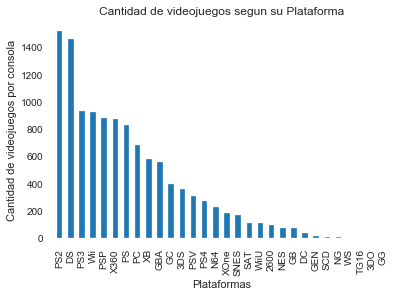

In [98]:
plt.title("Cantidad de videojuegos segun su Plataforma")  
plt.xlabel("Plataformas")
plt.ylabel("Cantidad de videojuegos por consola")
games2['Platform'].value_counts().plot.bar()

* El resultado que obtenemos es que como plataforma con mayor cantidad de videojuegos es la PlayStation 2 lo cual supera mas de los 1400 juegos totales de consolas, esto se debe a que muchos de los videojuegos historicamente fueron lanzados para PS2, lo cual el mercado y distribucion al nivel mundial hizo que fuera una plataforma (consola) facil de comprar videojuegos. Asi mismo tenemos como segundo lugar al Nintendo DS con mayores ventas a pesar de ser una consola portatil. La razones se ventas de videojuegos y popularidad de consolas se debe a que tan variado es el catalogo de las plataformas. Si tenemos una consola de 3D0 o GG pero no hay variedad en videojuegos el exito no es positivo asi como se puede ver en el histograma, ya que son casi nulas.

2. Para una genero especifico en este caso Carreras, vamos a ver como se distribuye con este histograma la cantidad de videojuegos lanzados segun la plataforma. Para este caso vamos a utilizar la columna de Platform donde se hara el conteo de juegos por consola.

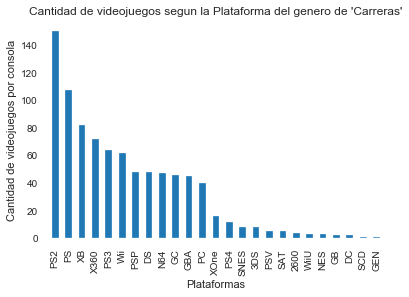

In [96]:
plt.title("Cantidad de videojuegos segun la Plataforma del genero de 'Carreras'")  
plt.xlabel("Plataformas")
plt.ylabel("Cantidad de videojuegos por consola")
Carreras['Platform'].value_counts().plot.bar()

* Como resultado obtenemos que la plataforma con mayor cantidad de juegos de genero Carreras es la PS2 (PlayStation 2), teniendo más de 140 videojuegos, después tenemos PS (PlayStation) con más de 100 juegos. así como menor cantidad de videojuegos SDC (Sega CD) y Gen(Sega Genesis) lo cual podemos ver que para estas consolas no hay casi videojuegos.

3. Para el género de Peleas también se hará el procedimiento anterior solo que ahora utilizando la clase de Peleas. El cual podemos obtener el siguiente gráfico.

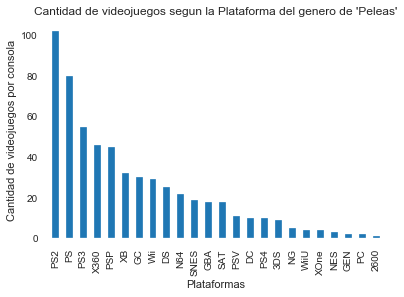

In [86]:
plt.title("Cantidad de videojuegos segun la Plataforma del genero de 'Peleas'")  
plt.xlabel("Plataformas")
plt.ylabel("Cantidad de videojuegos por consola")
Peleas['Platform'].value_counts().plot.bar()

* El resultado que observamos es que la PS2 (PlayStation 2) sigue teniendo mayor cantidad de videojuegos en este caso de peleas. Al igual PS y PS3, consolas de la misma empresa. Pero esta vez tomando en cuenta PC (Computadora) y 2600(Atari 2600) son las Plataformas con menor cantidad de videojuegos de este género.

4. El mismo procedimiento como la anterior, usamos la clase de disparos y veremos la cantidad de videojuegos que existen de este genero.

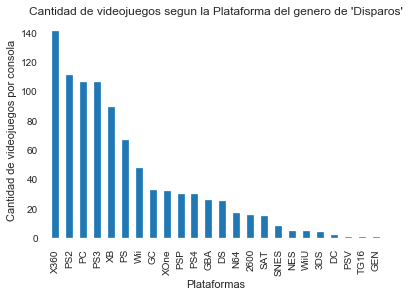

In [183]:
plt.title("Cantidad de videojuegos segun la Plataforma del genero de 'Disparos'")  
plt.xlabel("Plataformas")
plt.ylabel("Cantidad de videojuegos por consola")
Disparos['Platform'].value_counts().plot.bar()

* Como resultado obtenemos que la Plataforma con mayor cantidad de videojuegos de Disparos es X360 (Xbox 360) con 140 tomando mayor ventaja ante PS2 que en las anteriores graficas mostro un dominio. Sin embargo, PS2 está en segundo lugar con más de 100 videojuegos y en esta ocasión vemos a la PC (Computadora) como plataforma con cantidad de videojuegos. Al igual GEN (Sega Genesis sigue teniendo poca cantidad de videojuegos de este género.

### 3.2 Analisis de videojuegos por Empresa.

Para el análisis de las empresas se seleccionaron por interés del equipo y curiosidad de experimentar con estas empresas y por los videojuegos que estas tienen en sus catálogos. Veremos cómo podemos aplicar graficas para observar videojuegos más vendidos en Japón o Norte América, Años con mayores ventas y cantidad de videojuegos lanzados por consola. Utilizaremos graficas de pastel para intentar realizar estas aplicaciones que nosotros queremos realizar.

#### Empresa: SNK

###### Grafica de Ventas en Japon de la empresa SNK.
* Para esta grafica utilizaremos la clase de SNK, usaremos una variable suma para ir acumulado los videojuegos, usaremos como parametros el Nombre, y como variable para distribuir el ancho de cada rebanada o parte de la grafica se usara la columna de JP_Sales.

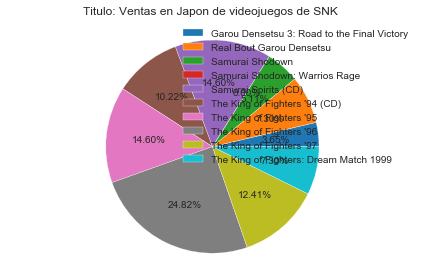

In [32]:
from matplotlib.pyplot import pie, axis, show
plt.title("Titulo: Ventas en Japon de videojuegos de SNK ")  
sums = SNK.groupby(SNK["Name"])["JP_Sales"].sum().head(10)
axis('equal');
#pie(sums,autopct='%.2f%%',startangle=200,labels=sums.index);
pie(sums,  autopct='%.2f%%');
plt.legend(labels=sums.index)
print("\n")


plt.tight_layout()
show()

* En esta grafica como resultado obtenemos que la empresa SNK el videojuego con mayor venta en Japón fue The King of Fighters 96, el cual se puede observar en la sección gris, como segundo juego tenemos The King of Fighters 95. Tomando en cuenta que solo se hizo la gráfica solo con 10 videojuegos con mayor venta, como menor juego representado en color azul es el Garou Densetsu 3 : Road to the Final Victory. Lo cual la saga de The King of fighters desde 95 hasta 98 teninan grandes v ventas. Dicho mercado hoy en dia para estos juegos en muy grande, lo cual las criticas casi no reducen con el pasar de los años.

###### Grafica con mayor ventas de SNK segun el año.

* Para esta grafica queremos ver que año SNK obtuvo mayores ventas en Japon. Para construirla utilizamos una varialble sums el cual vamos a ir acumulando la cantidad de ventas con respecto al año, esto esta dado por las variables de Year_of_Release y JP_Sales. y Obtenemos el siguiente grafico.

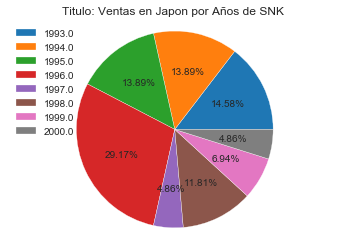

In [31]:
plt.title("Titulo: Ventas en Japon por Años de SNK ")
sums = SNK.groupby(SNK["Year_of_Release"])["JP_Sales"].sum().head(10)

#pie(sums, labels=sums.index,autopct='%.2f%%');
pie(sums,  autopct='%.2f%%');
plt.legend(labels=sums.index);
axis('equal')
show()


* En esta grafica como resultado obtenemos que el año en que SNK vendió más videojuegos fue en 1996. Esto está dado por el color rojo, después como segundo lugar 1995. Los años de menor venta como el año 2000 se debe a que tenía problemas y al estar unido con PLAYMORE, este lo podemos observar en color gris. Con este grafico podemos observar como las ventas se fueron dando en SNK y esto demuestra que en 1996 fue de sus unicas ventas grandes antes de entrar en problemas de la empresa.

###### Grafica con mayor cantidad de videojuegos segun la plataforma.

* Para ver la distribución de SNK dada a los videojuegos que fueron lanzados según la consola, haremos un gráfico utilizando las columnas de Platform y Critic_Score ya que las críticas son por cada videojuego lanzado, lo cual haremos una variable sums para hacer la acumulación de la cantidad de críticas que es el conteo de videojuego, y veremos a continuación el grafico.

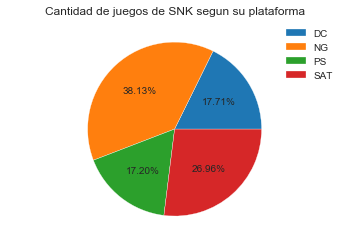

In [269]:
plt.title("Cantidad de juegos de SNK segun su plataforma")  
sums = SNK.groupby(SNK["Platform"])["Critic_Score"].sum()
axis('equal');
#pie(sums, labels=sums.index,autopct='%.2f%%');
pie(sums,  autopct='%.2f%%');
plt.legend(labels=sums.index,)

show()



* Como observamos el resultado es que la consola NG (Neo Geo) representada en color naranja es la consola con mayor cantidad de videojuegos, depues tenemos en color rojo a Sega Saturno, en azul como tercer lugar DC (Dream Cast) y ultimo lugar en color verde PlayStation. De esta manera podemos ver la proporcion de videojuegos lanzados por consola, lo cual aunque no halla tenido variedad de juegos para otras consolas denota un mercado grande en Japon.

##### Empresa: EA (Electronic Arts)

###### Grafica de Ventas en Norte America de la empresa EA.
* Para esta grafica utilizaremos la clase de EA, usaremos una variable suma para ir acumulado los videojuegos, usaremos como parametros el Nombre, y como variable para distribuir el ancho de cada rebanada o parte de la grafica se usara la columna de NA_Sales.

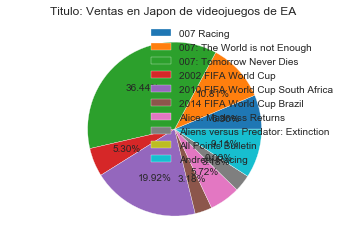

In [273]:
from matplotlib.pyplot import pie, axis, show
plt.title("Titulo: Ventas en Norte America de videojuegos de EA ")  
sums = EA.groupby(EA["Name"])["NA_Sales"].sum().head(10)
axis('equal');
#pie(sums, labels=sums.index,autopct='%.2f%%');
pie(sums,  autopct='%.2f%%');
plt.legend(labels=sums.index,)

show()

* En esta grafica el resultado es que el videojuego con mayor venta es 007: Tomorrow NEver Dies, esto lo podemos observar en color verde. Como segundo lugar tenemos al 2010 FIFA World Cup South Africa en color morado. Pero como menor venta de EA podemos observar al 2014 FIFA World Cup Brazil en cafe y ALL Points Bulletin en color gris como menores ventas.

###### Grafica con mayor ventas de EA segun el año.

Para esta grafica veremos el año con mayores ventas en la empresa EA, tomando en cuanta la columna de Year_of_Release y NA_Sales igual el procedimiento con SNK. Y obtenemos la siguiente grafica.

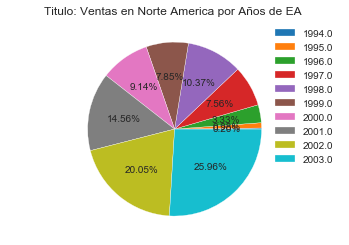

In [282]:
plt.title("Titulo: Ventas en Norte America por Años de EA ")
sums = EA.groupby(EA["Year_of_Release"])["NA_Sales"].sum().head(10)
axis('equal');
#pie(sums, labels=sums.index);
pie(sums,  autopct='%.2f%%');
plt.legend(labels=sums.index,)

show()


* El resultado nos da que EA vendio mas videojuegos en el año 2003 en color azul turqueza, tomando como segundo lugar en colo verde claro el año 2002 y el año con menor venta 1994 representado en color azul. Lo cual la distribucion de videojuegos para Japon de EA no es muy alta demanda de juegos de esa empresa como sus demas competencias.

###### Grafica con mayor cantidad de videojuegos segun la plataforma de EA.

Tomando en cuenta procesos anteriores, para elaborar nuestro grafico se utiliza la columna de Critic_Score y Platform, esto al realizar la grafica nos muestra lo siguiente.

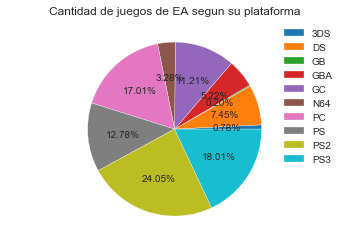

In [276]:
from matplotlib.pyplot import pie, axis, show
plt.title("Cantidad de juegos de EA segun su plataforma")  
sums = EA.groupby(EA["Platform"])["Critic_Score"].sum().head(10)
axis('equal');
pie(sums,  autopct='%.2f%%');
plt.legend(labels=sums.index,)

show()

* El resultado obtenido es que EA tiene mas cantidad de videojuegos de la consola de PS2 representado en color verde claro. Despues en color azul turquesa la plataforma de PS3 el cual como hemos visto anteriormente PS tiene uno de los catalagos mas grandes del mercado y de los que hayan existido. Por eso se da la popularidad de esta consola. Como consola con menor cantidad es GB(GameBoy) que es una plataforma movil de los 90s lo cual EA casi no lanzo juegos de esta plataforma.

##### Empresa: Capcom

###### Grafica de Ventas en Japon de la empresa Capcom.
* Para esta grafica utilizaremos la clase de Capcom, usaremos una variable suma para ir acumulado los videojuegos, usaremos como parametros el Nombre, y como variable para distribuir el ancho de cada rebanada o parte de la grafica se usara la columna de JP_Sales.

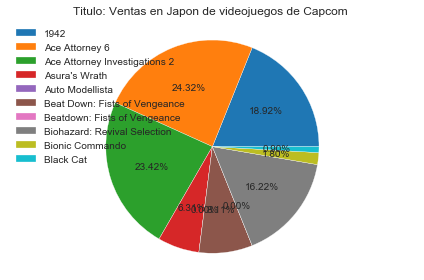

In [262]:
from matplotlib.pyplot import pie, axis, show
plt.title("Titulo: Ventas en Japon de videojuegos de Capcom ")  
sums = Capcom.groupby(Capcom["Name"])["JP_Sales"].sum().head(10)
axis('equal');
pie(sums,  autopct='%.2f%%' );
plt.legend(labels=sums.index,)
plt.tight_layout()
show()

* El resultado obtenido es que el juego con mayor venta en Japon de Capcom es Ace Attorney 6 representado en color naranja, depues en color verde  Ace Attorney Investigations 2 y como menor venta Black Cat. Lo que hace que 3 de los juegos vistos en el grafico son exitos, ya que solo 3 abarcan casi el total de ventas de solo Japon.

###### Grafica con mayor ventas de Capcom segun el año.

Se utilizaran las columnas de Year_of_Release y JP_Sales como las anteriores pero con datos de Capcom. Realizamos la grafica y obtenemos lo siguiente.

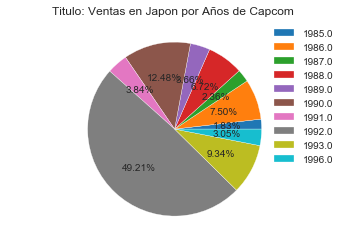

In [267]:
plt.title("Titulo: Ventas en Japon por Años de Capcom ")
sums = Capcom.groupby(Capcom["Year_of_Release"])["JP_Sales"].sum().head(10)
axis('equal');
pie(sums,  autopct='%.2f%%');
plt.legend(labels=sums.index,)

show()

* El resultado obtenido es que en el año de 1992 obtuvo mator cantidad de ventas esto en Japon, lo cual años anteriores se observa el año de 1985 como el de menor venta, asi como 1996 que a pesar de ser 3 años depues de sus mayores ventas. Lo cual el comportamiento mas grande a relacion de ventas es 1992.

###### Grafica con mayor cantidad de videojuegos segun la plataforma de Capcom.

Para esta grafica igual que las anteriores, para Capcom usaremos la columna de Platform y Critic_Score, para despues obtener el siguiente grafico.

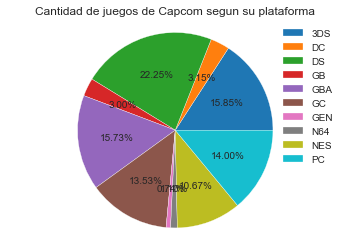

In [215]:
plt.title("Cantidad de juegos de Capcom segun su plataforma")  
sums = Capcom.groupby(Capcom["Platform"])["Critic_Score"].sum().head(10)
pie(sums, autopct='%.2f%%');  #,labels=sums.index#
axis('equal');
plt.legend(loc="best",labels=sums.index)
show()

* El resultado obtenido es que la plataforma con mayor cantidad de videojuegos es DS (Nintendo DS) mostrado en color verde, en segundo lugar tenemos a la 3DS (Nintendo 3DS), en color azul pero como consola con menor cantidad de juegos lanzados por Capcom es la GEN(Sega Genesis) y N64 (Nintendo 64). Por ello podemos ver que el mercado de consolas portatiles fue el que gano mayor variedad de videojuegos de Capcom.

## Preguntas de Interes.
* ¿Cuál es la aceptación de videojuegos dada una empresa (SNK) ?
    
     R= En el grafico para SNK muchos de los videojuegos se juegan en NG (Neo Geo) lo cual dadas las ventas como referencia y punto especifico del mercado, la popularidad es muy alta ya lo demuestra The king of Fighters 96 que tiene para la empresa SNK como el de mayor venta, las ventas y la disponiibilidad de estar para otras consolas se debe las grandes aceptaciones de la empresa.
* ¿Con los datos de la base de datos de videojuegos como se pueden clasificar aplicando algún método de minería de datos?

    R= lo que se puede hacer es un clasificador de videojuegos dando datos del género (Genre) y la empresa de videojuegos (Publisher) el cual es una de las formas que se pueden utilizar de manera rápida obteniendo resultados organización de videojuegos.
    
* ¿Cuál es el comportamiento de las empresas con sus respectivas ventas en Norte América o Japón?
    
    R= Con el análisis hecho de algunas empresas se notó que Capcom en el mercado de Japón un videojuego que se muestra en la gráfica de pastel representa casi las ventas totales casi el 50 % de las ventas. A comparación de EA 3 videojuegos son los que hacen casi el 50% de las ventas. En cambio, SNK 4 hacen el 50 % de las ventas, es por ello vemos que Capcom tiene un mercado y nivel de aceptacion muy grande en Japón. 



* ¿Cuál es la plataforma de videojuegos con mayores ventas de videojuegos en un género especifico (peleas,disparos,Carreras) ?   
    R= La plataforma con los géneros estudiados es que la plataforma con mayores videojuegos es PS2, históricamente es la consola con uno de los catálogos más amplios que han existido. Lo que también se observo es que Capcom tiene mucho catálogo de videojuegos en consolas portátiles de Nintendo, a comparación de X360 es que se demuestra que el género de disparos es mucho mayor en X360 consola de Microsoft. La distribución de ventas de genero depende mucho de la exclusividad para la consola o la popularidad, tal como se demostró que PS2 tiene mayor cantidad de videojuegos.


Text(0.5, 1.0, 'Cantidad en % por genero total de videojuegos')

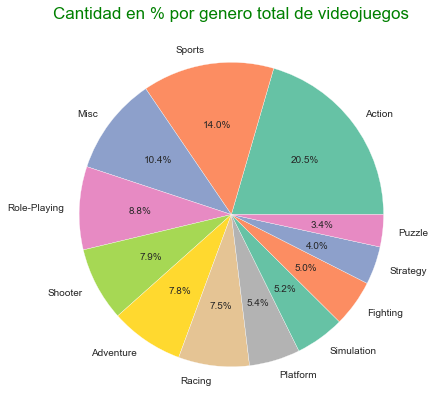

In [3]:
labels=games2.Genre.value_counts().index
explode = [0,0,0,0,0,0,0,0,0,0,0,0]
sizes = games2.Genre.value_counts().values
# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=sn.color_palette('Set2'), autopct='%1.1f%%')
plt.title('Cantidad en % por genero total de videojuegos',fontsize = 17,color = 'green')

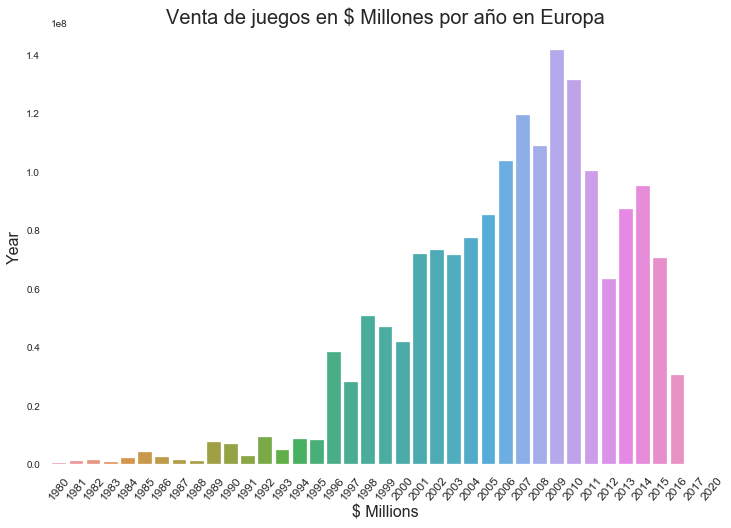

In [4]:
y = games2.groupby(['Year_of_Release']).sum()
y = y['EU_Sales']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sn.barplot(y = y, x = x)
ax.set_xlabel(xlabel='$ Millions', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Venta de juegos en $ Millones por año en Europa', fontsize=20)
plt.show();

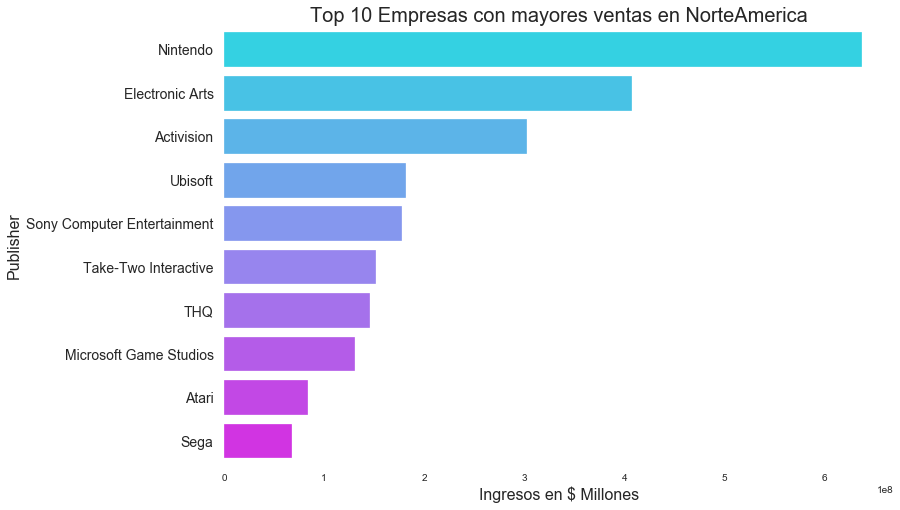

In [6]:
data = games2.groupby(['Publisher']).sum()['NA_Sales']
data = pd.DataFrame(data.sort_values(ascending=False))[0:10]
publishers = data.index
data.columns = ['NA_Sales']

colors = sn.color_palette("cool", len(data))
plt.figure(figsize=(12,8))
ax = sn.barplot(y = publishers , x = 'NA_Sales', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Ingresos en $ Millones', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Top 10 Empresas con mayores ventas en NorteAmerica', fontsize=20)
ax.set_yticklabels(labels = publishers, fontsize=14)
plt.show();

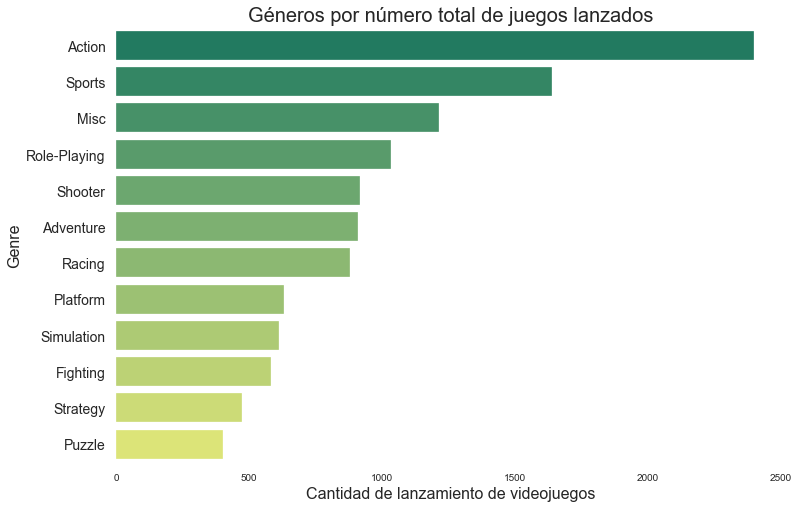

In [8]:
rel = games2.groupby(['Genre']).count().iloc[:,0]
rel = pd.DataFrame(rel.sort_values(ascending=False))
genres = rel.index
rel.columns = ['Releases']

colors = sn.color_palette("summer", len(rel))
plt.figure(figsize=(12,8))
ax = sn.barplot(y = genres , x = 'Releases', data=rel, orient='h', palette=colors)
ax.set_xlabel(xlabel='Cantidad de lanzamiento de videojuegos', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title(label='Géneros por número total de juegos lanzados', fontsize=20)
ax.set_yticklabels(labels = genres, fontsize=14)
plt.show();

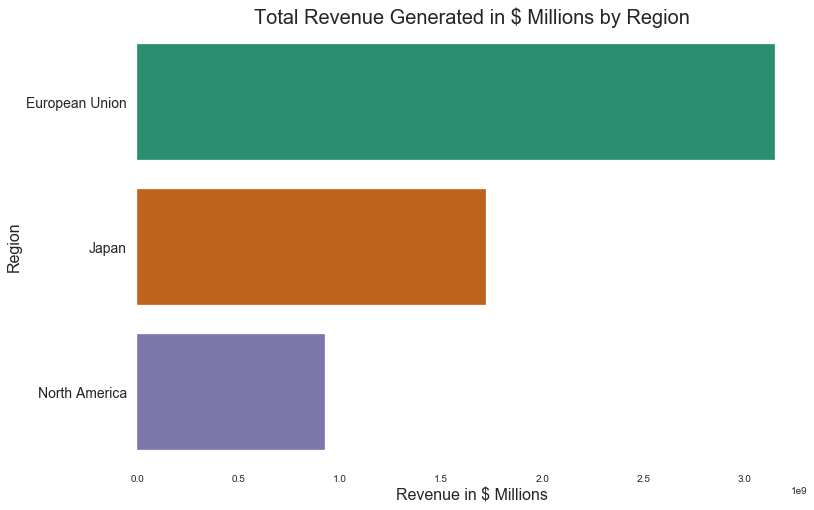

In [9]:
data = games2.sum()
data = pd.DataFrame([data['EU_Sales'], data['JP_Sales'], data['NA_Sales']])
regions = ['European Union', 'Japan', 'North America']
data.index = regions
data.columns = ['Revenue']
data = data.sort_values(by='Revenue', ascending=False)

plt.figure(figsize=(12,8))
colors = sn.color_palette("Dark2", len(data))
ax = sn.barplot(y = regions , x = 'Revenue', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Region', fontsize=16)
ax.set_title(label='Ingresos totales generados en $ millones por región', fontsize=20)
ax.set_yticklabels(labels = regions, fontsize=14)
plt.show();